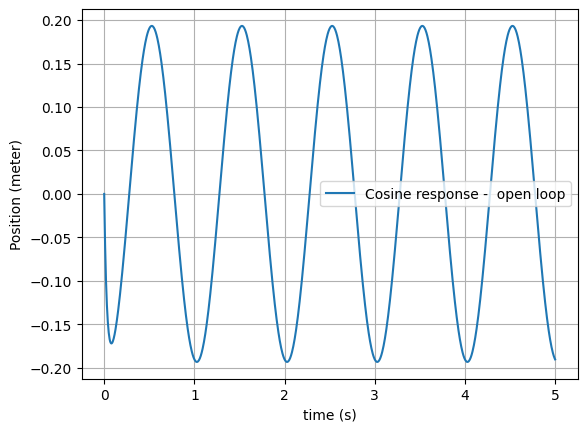

In [173]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt

# maybe change it to be theta and not alpha, because maybe not really plant.
# open loop plant (idk if cool?)
g = 9.81
# d = 0.0375
# L = 0.1725
b = 0.05 # total guess
m = 0.05 # weight of ball
R = 0.02

# num = [-5/7*g*(d/L)] # this technically makes the tf x/alpha, with alpha equals the angle of the motor, not that of the beam.
num = [-5/7*g] # this equals tf = x/theta, the angle of the beam
den = [1, (5*b)/(7*m*R), 0]

G_plant = tf(num, den)

# step response and pulse response:
step = tf([1],[1,0])
Y_step = G_plant * step
pulse = tf([1],[1])
Y_pulse = G_plant * step

# t = np.linspace(0, 10, 500)
# omega = 2 * np.pi * 10  # 10 Hz
# phi = np.pi/12 * np.cos(omega * t)

# # Simulate
# t_out, y_out = forced_response(G_plant, t, phi)

# plt.plot(t_out, y_out, label='Output (ball position)')
# plt.legend()
# plt.xlabel('Time [s]')
# plt.ylabel('Amplitude')
# plt.grid(True)
# plt.show()

f = 1 # frequency
a =  2*np.pi*f # angular frequency
cos = tf([1,0,0],[1,0,a**2])
Y_cosine = G_plant * cos

sin = tf([a**2],[1,0,a**2])
Y_sine = G_plant * sin

# show actual equations
# print('input pulse = ', step)
# print('plant transfer function = ', G_plant)
# print('output Y = ', Y_step)
# print('input pulse = ', pulse)
# print('plant transfer function = ', G_plant)
# print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_plant,T=1,T_num=200, X0=0)     #X0 can be set as initial condition
y_angle = y*(np.pi/12) # change to whatever angle we want to try as a step.
t2,yc = impulse_response(G_plant,T=1,T_num=200)
t3,yc2 = impulse_response(Y_sine, T=10, T_num=1000)
t4,yc3 = impulse_response(Y_cosine, T=5, T_num=1000)
# plt.plot(t,y_angle, label='Step response - open loop')
# plt.plot(t2,yc, label='Impulse response -  open loop')
# plt.plot(t3,yc2, label='Sine response -  open loop')
plt.plot(t4,yc3, label='Cosine response -  open loop')
plt.grid()
plt.xlabel('time (s)') # unsure if should be angle
plt.ylabel('Position (meter)')
plt.legend()


G_motor =  <TransferFunction>: sys[1826]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            0.0274
  --------------------------
  1.32e-05 s^2 + 0.0007648 s
input step =  <TransferFunction>: sys[1827]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  1
  -
  s
motor transfer function =  <TransferFunction>: sys[1826]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            0.0274
  --------------------------
  1.32e-05 s^2 + 0.0007648 s
output Y =  <TransferFunction>: sys[1828]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             0.0274
  ----------------------------
  1.32e-05 s^3 + 0.0007648 s^2
input pulse =  <TransferFunction>: sys[1829]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = None

  1
  -
  1
motor transfer function =  <TransferFunction>: sys[1826]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            0.0274
  --------------------------
  1.32e-05 s^2 + 0.0007648 s
output Y =  <TransferFunction>: sys[1830]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             0.02

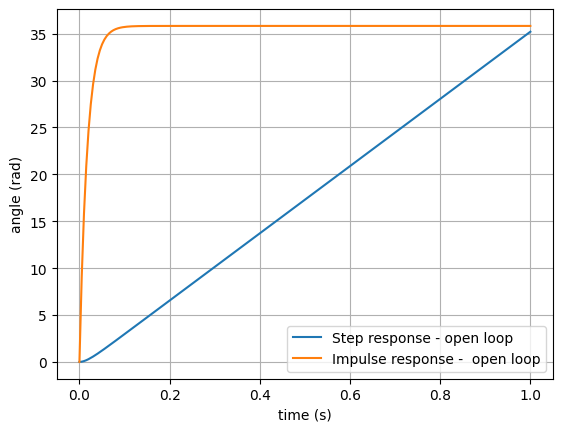

In [157]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt

# open loop motor
# values taken from https://ctms.engin.umich.edu/CTMS/index.php?example=MotorPosition&section=SystemModeling
J = 3.3*10**-6
b_m = 3.5*10**-6
K = 0.0274
L_m = 0 # think if we neglect it, e.g; let it be 0
R_E = 4 # guess, could maybe also be ~12 or 20, need to check notes.

num = [K]
den = [J*L_m, (R_E*J)+(b_m*L_m), (K**2)+(b_m*R_E), 0]

G_motor = tf(num, den)

# step response and pulse response:
step = tf([1],[1,0]) # figire out of numerator value matters.
Y_step = G_motor * step
pulse = tf([1],[1])
Y_pulse = G_motor * step

# show actual equations
print('G_motor = ', G_motor)
print('input step = ', step)
print('motor transfer function = ', G_motor)
print('output Y = ', Y_step)
print('input pulse = ', pulse)
print('motor transfer function = ', G_motor)
print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_motor,T=1,T_num=200, X0=0)     #X0 can be set as initial condition
t2,yc = impulse_response(G_motor,T=1,T_num=200)
plt.plot(t,y, label='Step response - open loop')
plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('angle (rad)')
plt.legend()


G_total = G_plant*G_motor <TransferFunction>: sys[1835]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                    -0.192
  ------------------------------------------
  1.32e-05 s^4 + 0.000859 s^3 + 0.005463 s^2
G_total =  <TransferFunction>: sys[1835]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                    -0.192
  ------------------------------------------
  1.32e-05 s^4 + 0.000859 s^3 + 0.005463 s^2
input pulse =  <TransferFunction>: sys[1836]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  1
  -
  s
total transfer function =  <TransferFunction>: sys[1835]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                    -0.192
  ------------------------------------------
  1.32e-05 s^4 + 0.000859 s^3 + 0.005463 s^2
output Y =  <TransferFunction>: sys[1837]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                    -0.192
  ------------------------------------------
  1.32e-05 s^5 + 0.000859 s^4 + 0.005463 s^3
input pulse =  <TransferFunction>: sys[1838]
Inputs (1): ['

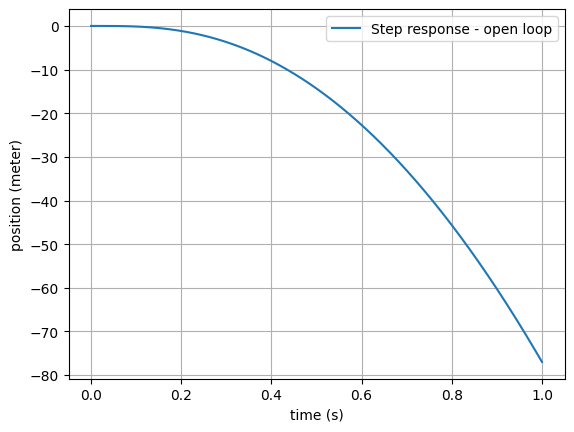

In [158]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt


# open loop plant+motor
G_total = G_plant*G_motor
print('G_total = G_plant*G_motor', G_total)
# maybe add response step, pulse, with/without IC

# step response and pulse response:
step =tf([1],[1,0])
Y_step = G_total * step
pulse =tf([1],[1])
Y_pulse = G_total * step

print('G_total = ', G_total)
# show actual equations
print('input pulse = ', step)
print('total transfer function = ', G_total)
print('output Y = ', Y_step)
print('input pulse = ', pulse)
print('total transfer function = ', G_total)
print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_total,T=1,T_num=1000, X0=0)#X0 can be set as initial condition
y_pos = y*6 # scaled by 6 for a 6v step ?
# t2,yc = impulse_response(G_total,T=1,T_num=200)
plt.plot(t,y_pos, label='Step response - open loop')
# plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('position (meter)')
plt.legend()






PID =  <TransferFunction>: sys[1842]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  0.01 s^2
  --------
     s
G_controlled =  <TransferFunction>: sys[1845]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                        -0.00192 s^2
  --------------------------------------------------------
  1.32e-05 s^5 + 0.000859 s^4 + 0.005463 s^3 - 0.00192 s^2


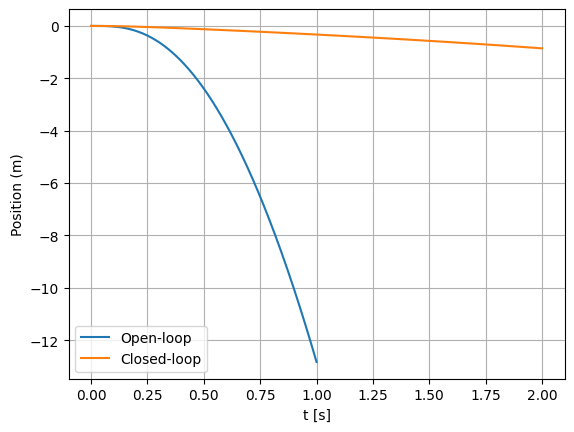

In [159]:
# add PI controller (now it is closed loop)
num = Kp,Ki,Kd=0.01,0,0 # idk if this way of defining is allowed. d = 0 because otherwise deg(num) > deg(den)
den = [1, 0]
controller = tf(num,den)
print('PID = ', controller)

G_control = controller*G_total
G_controlled = feedback(G_control,[1],-1)  #GF is forward gain, [1] is unity feedback loop with -1 indicating negative feedback

print('G_controlled = ', G_controlled)

t2, yc = step_response(G_controlled,T=2,T_num=100)
# t2, yc = step_response(Gtotf,T=10,T_num=200,X0=-0.0)  
plt.plot(t,y, label='Open-loop')
plt.plot(t2,yc, label='Closed-loop')
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('Position (m)')
plt.legend()

#impulse_response(g,T=10,T_num=200)




# TODO add bode plots and pole zero plot at what places?